<h1>Iris dataset classification</h1>

<h3>Loading and preparing the dataset</h3>

After looking at the whole dataset I consider scaling unneccesary in this case. Feature values seem to be of roughly the same order of magnitude and contained in the (0.0, 10.0) range.

In [1]:
from sklearn import datasets, model_selection, svm, tree
import matplotlib.pyplot as plt

rand_st = 3784

iris_dataset = datasets.load_iris()
X, y = iris_dataset.data, iris_dataset.target
feature_names = iris_dataset.feature_names
class_names = iris_dataset.target_names

training_features, test_features, training_labels, test_labels = model_selection.train_test_split(X, y, test_size = 0.3, random_state=rand_st)
# set random_state for reproducible results

# take a look inside
training_features[:6]

array([[6.3, 2.7, 4.9, 1.8],
       [6.3, 2.3, 4.4, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5.8, 2.6, 4. , 1.2],
       [5.1, 3.7, 1.5, 0.4],
       [7.1, 3. , 5.9, 2.1]])

<h3>Training classifiers</h3>

The dataset is balanced (classes occur in a 1:1:1 ratio) and there are only 4 features, so a decision tree classifier could be an efficient solution. A Support Vector Classifier seems to be suitable as well and I will train one in addition to that for comparison.

Support Vector Machine accuracy: 0.911
Decision Tree accuracy: 0.956

Decision tree visualisation


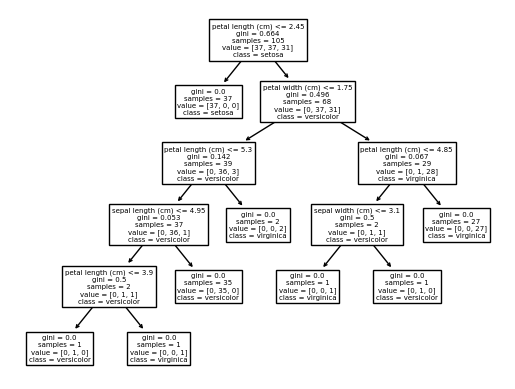

In [2]:
classifiers = {
    'Support Vector Machine' : svm.SVC(),
    'Decision Tree' : tree.DecisionTreeClassifier(random_state= rand_st)
    # set random state for the decision tree; the default SVC without probability estimates is non-probabilistic
}

def train_and_evaluate():
    for name, classifier in classifiers.items():
        classifier.fit(training_features, training_labels)
        print('{} accuracy: {:.3f}'.format(name, classifier.score(test_features, test_labels)))

    print('\nDecision tree visualisation')
    tree.plot_tree(classifiers['Decision Tree'], feature_names= feature_names, class_names= class_names)
    plt.show()

train_and_evaluate()

Both models have reached a good accuracy for this simple dataset (with this particular random state) even when using the default parameters. However, the created decision tree is quite complex for this problem and might be slightly overfitted. I will try to tweak the models below.

Note: when experimenting with different random states, the models usually reach 91% to 96% accuracy and there are no major differences between the two classifiers. Setting rand_st to 42 allows both to hit 100%, which suggests a lucky split of training/test data.

In [8]:
parameter_grid = {
    'kernel' : ['linear', 'rbf', 'poly'],
    'C' : [0.2, 0.5, 1, 3, 10],
}
    
grid_search = model_selection.GridSearchCV(svm.SVC(), parameter_grid)
grid_search.fit(X, y)

print(grid_search.best_params_)

{'C': 0.5, 'kernel': 'linear'}


Support Vector Machine accuracy: 0.978
Decision Tree accuracy: 0.978

Decision tree visualisation


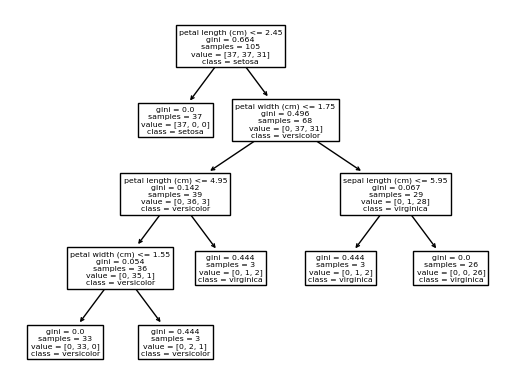

In [9]:
classifiers = {
    'Support Vector Machine' : svm.SVC(C= 0.5, kernel= 'linear'),
    'Decision Tree' : tree.DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=3, random_state= rand_st)
}

train_and_evaluate()

Modifying the decision tree parameters allowed to both reduce the complexity of the tree and increase prediction accuracy. It is likely the new model generalizes better.

A grid search for better SVC parameters yielded a configuration for a more accurate SVM model.

97.8% seems to be a good enough result to stop further tweaking.